In [2]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 10.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=393bb7d5a3ebbe084c330f26853a97c1c90ef3dbb542a48a892f1996ce1fff20
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=954103cc9f86da5917de6455ee3667785db736de398e2e960948aa3efe1f2b4d
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from keras.preprocessing import image
from keras.models import Sequential
from kerastuner import RandomSearch
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import random
import os

In [4]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


## Reading whole image data into the program to perform hyperparameter optimization

In [6]:
datadir = '/content/drive/MyDrive/Project/Segmented Medicinal Leaf Images'
categories = os.listdir(datadir)

In [7]:
len(categories)

30

In [8]:
data = []
for category in categories:
  path = os.path.join(datadir, category)
  labels = categories.index(category)
  for imgpath in os.listdir(path):
    imgs = image.load_img(os.path.join(path, imgpath),target_size=(120,160))
    data.append((imgs, labels))

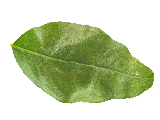

In [9]:
data[45][0]

In [10]:
len(data)

1835

In [11]:
random.shuffle(data)

In [ ]:
# data

In [12]:
X_img = []
y_lab = []
for img , label in data:
  X_img.append(img)
  y_lab.append(label)

In [13]:
X_list = [ image.img_to_array(img) for img in X_img]

In [14]:
X = np.asarray(X_list)


In [15]:
X.shape

(1835, 120, 160, 3)

In [16]:
X /= 255

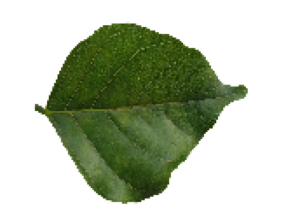

In [17]:
plt.figure(figsize=(5,5))
plt.imshow(X[170])
plt.axis('off')
plt.show()

In [18]:
y = np.asarray(y_lab)

In [19]:
y.shape

(1835,)

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=42)

In [21]:
xtrain.shape

(1284, 120, 160, 3)

In [22]:
def build_model(hp):
  model = Sequential()

  model.add(Conv2D(filters = hp.Int('conv_1_filters',         #input layer
                              min_value = 32, 
                              max_value = 128, 
                              step = 16),
             kernel_size = hp.Choice('conv_1_kernel', values = [3,5]),
             activation='relu',
             input_shape = (120,160,3)))
  
  model.add(Conv2D(filters = hp.Int('filters_1', 
                              min_value = 32, 
                              max_value = 128, 
                              step = 16),
             kernel_size = hp.Choice('kernel_1', values = [3,5]),
             activation='relu'
      ))
  
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters = hp.Int('filters_2', 
                              min_value = 32, 
                              max_value = 128, 
                              step = 16),
             kernel_size = hp.Choice('kernel_2', values = [3,5]),
             activation='relu'
      ))
  
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters = hp.Int('filters_3', 
                              min_value = 32, 
                              max_value = 128, 
                              step = 16),
             kernel_size = hp.Choice('kernel_3', values = [3,5]),
             activation='relu'
      ))
  
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  
  model.add(Flatten())

  model.add(Dense(units=hp.Int('units',
                  min_value=32,
                  max_value=256,
                  step=32),
                  activation='sigmoid'))
  
  model.add(Dropout(0.2))
  
  model.add(Dense(30, activation='softmax'))                  #output layer
  
  model.compile(optimizer = Adam(hp.Choice('learning_rate', values=[0.01,0.001,0.0001])),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
  return model   


## Hyper tuning using keras tuner

In [23]:
tuner = RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials=5,
                    executions_per_trial=3 ,
                    directory = 'output_cnn',
                    project_name = 'medicinal plant identification cnn100')

In [24]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
conv_1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
filters_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
kernel_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
filters_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
kernel_2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
filters_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
kernel_3 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate 

In [25]:
tuner.search(xtrain,ytrain,
             epochs=10,
             validation_data=(xtest,ytest),
            #  callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2, verbose=1)]
             )

Trial 5 Complete [00h 01m 55s]
val_accuracy: 0.06533575057983398

Best val_accuracy So Far: 0.7840290466944376
Total elapsed time: 00h 09m 46s
INFO:tensorflow:Oracle triggered exit


### Best parameters we got :

In [26]:
tuner.results_summary()

Results summary
Results in output_cnn/medicinal plant identification cnn100
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1_filters: 32
conv_1_kernel: 5
filters_1: 96
kernel_1: 3
filters_2: 64
kernel_2: 3
filters_3: 48
kernel_3: 5
units: 160
learning_rate: 0.001
Score: 0.7840290466944376
Trial summary
Hyperparameters:
conv_1_filters: 64
conv_1_kernel: 3
filters_1: 112
kernel_1: 3
filters_2: 80
kernel_2: 3
filters_3: 128
kernel_3: 5
units: 256
learning_rate: 0.001
Score: 0.7664851943651835
Trial summary
Hyperparameters:
conv_1_filters: 80
conv_1_kernel: 3
filters_1: 80
kernel_1: 3
filters_2: 112
kernel_2: 3
filters_3: 64
kernel_3: 3
units: 96
learning_rate: 0.0001
Score: 0.4658197263876597
Trial summary
Hyperparameters:
conv_1_filters: 128
conv_1_kernel: 5
filters_1: 96
kernel_1: 3
filters_2: 96
kernel_2: 3
filters_3: 32
kernel_3: 3
units: 32
learning_rate: 0.0001
Score: 0.3424077332019806
Trial summary
Hyperparameters:
conv_1

In [27]:
model = tuner.get_best_models(num_models=1)[0]

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 116, 156, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 114, 154, 96)      27744     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 57, 77, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 57, 77, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 75, 64)        55360     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 37, 64)        0

In [29]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3, verbose=1)]

In [30]:
model.fit(xtrain, ytrain, epochs=50,batch_size=128, validation_split=0.1, initial_epoch=3, callbacks=callbacks)

Epoch 4/50
10/10 [==============================] - 5s 271ms/step - loss: 0.4243 - accuracy: 0.9174 - val_loss: 0.3983 - val_accuracy: 0.9225
Epoch 5/50
10/10 [==============================] - 2s 221ms/step - loss: 0.3846 - accuracy: 0.9339 - val_loss: 0.4392 - val_accuracy: 0.8992
Epoch 6/50
10/10 [==============================] - 2s 222ms/step - loss: 0.3992 - accuracy: 0.9181 - val_loss: 0.4285 - val_accuracy: 0.9225
Epoch 7/50
10/10 [==============================] - 2s 221ms/step - loss: 0.3689 - accuracy: 0.9391 - val_loss: 0.4721 - val_accuracy: 0.8837
Epoch 00007: early stopping


In [31]:
model.evaluate(xtest,ytest)

18/18 [==============================] - 0s 21ms/step - loss: 0.7575 - accuracy: 0.7931


[0.7575158476829529, 0.7931034564971924]

In [32]:
model.predict_classes(xtest[[123],:])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([26])

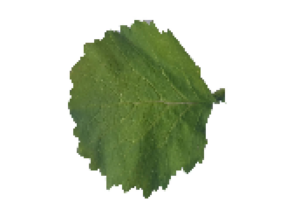

In [33]:
plt.figure(figsize=(5,5))
plt.imshow(xtest[123])
plt.axis('off')
plt.show()

In [34]:
ytest[123]

26

In [35]:
categories[26]

'Brassica Juncea (Indian Mustard)'

Saving model :

In [37]:
model.save('/content/drive/MyDrive/Project/model.h5')